# Plot overlap matrix of Sujechon

## Find distance matrix

In [1]:
input_info = 'sujechon_gukakjeonjip_2_info.txt'
output_allnode = 'sujechon_gukakjeonjip_2_allnode.txt'
output_nodelist = 'sujechon_gukakjeonjip_2_nodelist.txt'
output_distmat = 'sujechon_gukakjeonjip_2_distmat.txt'



f = open(input_info,'r'); l = len(f.readlines())
f = open(input_info,'r')

s = [];
for i in range(l):
    s.append(f.readline())

p = [];
for j in range(l):
    t = s[j].split('"')
    p.append([
        int(t[1]),
        int(t[3]),
        int(t[5])
    ])

r = [
        [ p[0][0], p[0][2] - p[0][1] ]
    ];
a = p[0][2]
for i in range(1,l):
    b = p[i][1]
    if a != b:
        r.append(
            [ 0, b - a ]
        )
    r.append(
        [ p[i][0], p[i][2] - p[i][1] ]
    )
    a = p[i][2]

q = []
#Convert data format.
for i in range(len(r)):
    pitch = r[i][0]
    duration = r[i][1]
    if pitch == 66: # F4
        pitch = 349
    elif pitch == 71: # C4
        pitch = 262
    elif pitch == 73: # A#3
        pitch = 233
    elif pitch == 68: # D#4
        pitch = 311
    elif pitch == 75: # G#3
        pitch = 208
    elif pitch == 61: # A#4
        pitch = 466
    elif pitch == 63: # G#4
        pitch = 415
    elif pitch == 56: # D#5
        pitch = 622
    elif pitch == 59: # C5
        pitch = 523
    elif pitch == 54: # F5
        pitch = 699
    elif pitch == 70: # C#4
        pitch = 278
    elif pitch == 64: # G4
        pitch = 392
    elif pitch == 52: # G5 Go
        pitch = 784
    elif pitch == 51: # G#5
        pitch = 831
    elif pitch == 58: # C#5 Mu
        pitch = 554
    elif pitch == 0: # rest
        pitch = 0
    else:
        print ('Something is wrong', pitch)
    duration = duration/160 
    q.append([pitch,duration])

#Convert pitch.duration
o = []
for i in range(len(q)):
    o.append(q[i][0] + q[i][1]/100.)

with open(output_allnode,'w') as f:
    for node in o:
        f.write('%s\n' % node)

n = len(o)
nodelist = [o[0]]
for i in range(n):
    if not(o[i] in nodelist):
        nodelist.append(o[i])

with open(output_nodelist,'w') as f:
    for node in nodelist:
        f.write('%s\n' % node)   
        
###############################################################################
### FIND DIST_MAT
        
import networkx as nx
from sympy import zeros
import numpy as np

L = np.loadtxt(output_allnode)

G = nx.Graph()
G.add_nodes_from(L)

for i in range(len(L)-1):
    if L[i] != L[i+1]:
        e0 = L[i]
        e1 = L[i+1]
        if G.has_edge(e0,e1): 
            G[e0][e1]['weight'] += 1
        else:
            G.add_edge(e0,e1,weight=1)
        
# find distance matrix
nodelist = list(G.nodes)

distmat = zeros(len(G.nodes))
for i in range(len(G.nodes)):
    for j in range(i,len(G.nodes)):
        if j == i:
            distmat[i,j] = 0
        else:
            path = nx.shortest_path(G,nodelist[i],nodelist[j]) # shortest_path
            for k in range(len(path)-1):
                distmat[i,j] += 1/G[path[k]][path[k+1]]['weight']
        distmat[j,i] = distmat[i,j]

# write distance matrix to a file
mat = np.matrix(distmat)
with open(output_distmat,'w') as f:
    for line in mat:
        np.savetxt(f,line,fmt='%.15f')

## (Run Matlab code after this step to find annotated intervals.)

## extract cycle info

In [2]:
def d1_info(filename): # filename = input_matlabinfo
    import json  
    f = open(filename,'r'); l = len(f.readlines())
    f = open(filename,'r')
    
    s = []
    for i in range(l):
        s.append(f.readline())
        
    # dim1 info
    d1s = []    
    for i in range(l):
        if s[i] == 'Dimension: 1\n':
            start_inx = i+1
    for j in range(start_inx,l):        
        if s[j] == 'Dimension: 2\n' or s[j] == '\n':
            end_inx = j
            break
    for k in range(start_inx,end_inx):        
            d1s.append(s[k])
            
    # get cycle info      
    c_info = []        
    for i in range(len(d1s)):
        ci_int,ci = d1s[i].split(': ')  
        ci = ci.split('\n')[0]
        ci_edge = ci.split(' + ')
        for j in range(len(ci_edge)):
            if ci_edge[j][0] == '-':
                ci_edge[j] = json.loads(ci_edge[j][1:])
                ci_edge[j] = ci_edge[j][::-1]
            else:
                ci_edge[j] = json.loads(ci_edge[j])
        ci_node = []
        for k in range(len(ci_edge)):
            for node in ci_edge[k]:
                if not(node in ci_node):
                    ci_node.append(node)
        ci_node.sort()
        c_info.append([ci_node,ci_int,ci_edge])
    c = []
    e = []
    for i in range(len(c_info)):
        c.append(c_info[i][0])
        e.append(c_info[i][2])    
    return d1s,c,e    
############################################################################### 

input_matlabinfo = 'sujechon_gukakjeonjip_2_intervals.txt'
output = 'sujechon_gukakjeonjip_2_cycleinfo_matlabinx.txt'



_,c,_ = d1_info(input_matlabinfo)
# write cycle info to a file
with open(output,'w') as f:
    for item in c:
        f.write('%s\n' %item)



In [3]:
c

[[6, 7, 20, 37, 38],
 [4, 6, 11, 12, 20],
 [4, 6, 7, 8, 9, 10, 11, 20],
 [12, 14, 15, 31],
 [15, 16, 25, 27, 28],
 [2, 3, 6, 14, 15, 20],
 [4, 11, 19, 20, 23],
 [2, 4, 15, 19, 20, 24],
 [13, 15, 26, 29, 30],
 [6, 7, 14, 15, 17, 18, 19, 24],
 [20, 35, 36, 43],
 [6, 13, 46, 47],
 [3, 4, 25, 32],
 [6, 12, 38, 51],
 [4, 11, 19, 59],
 [6, 12, 20, 49, 50],
 [6, 20, 35, 55],
 [6, 7, 20, 34, 35, 36, 40, 41, 42],
 [2, 4, 5, 7, 36, 40, 58],
 [2, 4, 5, 7, 18, 19, 47, 48],
 [4, 6, 13, 20, 26, 35, 45],
 [7, 33, 34, 40, 41, 42],
 [7, 34, 39, 40, 41, 42],
 [7, 34, 40, 41, 42, 44],
 [7, 34, 40, 41, 42, 54],
 [2, 3, 4, 5, 6, 7, 34, 38, 43, 52, 53]]

## convert music ordered (matlab) index to pitch ordered index

In [4]:
# convert node index from MUSIC ORDERED (matlab result) -> PITCH ORDERED (paper)
import numpy as np
import json

nl_SJC = np.loadtxt('sujechon_gukakjeonjip_2_nodelist.txt',delimiter=',')
in_matlabinx_SJC = open('sujechon_gukakjeonjip_2_cycleinfo_matlabinx.txt')
out_paperinx_SJC = 'sujechon_gukakjeonjip_2_cycleinfo_pitchinx.txt'


def convert(nl,in_matlabinx,out_paperinx):
    f = in_matlabinx
    nls = sorted(nl)
    paperinx = []
    Lines = f.readlines()
    for line in Lines:
        ci = json.loads(line)
        ci_paperinx = []
        for i in ci:
            n = nl[i]
            for j,node in enumerate(nls):
                if node == n:
                    ci_paperinx.append(j)
        paperinx.append(ci_paperinx)
        with open(out_paperinx,'w') as outf:
            for ci_p in paperinx:
                outf.write('%s\n' % ci_p)
convert(nl_SJC,in_matlabinx_SJC,out_paperinx_SJC)




                

## Plot overlap matrix

In [5]:
####### Cycle node numbers ##################
import json
f = open('sujechon_gukakjeonjip_2_cycleinfo_pitchinx.txt')
c = []
Lines = f.readlines()
for line in Lines:
    ci = json.loads(line)
    c.append(ci)

import numpy as np
L = list(np.loadtxt('sujechon_gukakjeonjip_2_allnode.txt',delimiter=','))    
nodelist = list(np.loadtxt('sujechon_gukakjeonjip_2_nodelist.txt',delimiter=','))
nodelist = sorted(nodelist)    

def nodeoverlap(c, L, nodelist):
    matrix = []; 
    for ci in c: # [0 6 19 20]
        row = []
        for node in L:
            inx = nodelist.index(node)
            if inx in ci:
#                 row.append(inx+1)
#                row.append(ci.index(inx)+1)
                row.append(1)
            else:
                row.append(0)
        matrix.append(row)
    for q in [3]:#range(1,8):#[3,4,5]:
        mat = [];
        for j,row in enumerate(matrix):
            new = []; leng = 0
            # construct new row
            for i,node in enumerate(row):
                if node == 0:
                    if leng == 0:
                        new.append(0)
                    else:
                        if leng > q:
                            new += row[i-leng:i]+[0]
                        else:
                            new += [0]*leng+[0]
                        leng = 0
                else:
                    leng += 1
            if leng != 0:
                if leng > q:
                    new += row[len(row)-leng:]
                else:
                    new += [0]*leng
            mat.append(new)
    
    return mat

mat1 = nodeoverlap(c, L, nodelist)  




In [6]:
import matplotlib.pyplot as plt

import seaborn as sns

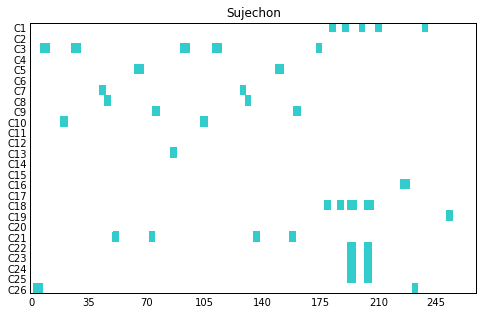

In [7]:
# plot overlap matrix
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

from matplotlib.colors import ListedColormap


ax=sns.heatmap(mat1, cmap=ListedColormap(['white', (0.2,0.8,0.8)]),yticklabels = ['C'+str(i+1) for i in range(len(mat1))],cbar=False)



ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = len(mat1)-0.1, color = 'k',
            linewidth = 1)
  
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
  
ax.axvline(x = len(mat1[0])-0.6, 
            color = 'k', linewidth = 1)


n = 5  
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]




plt.setp(ax.get_xticklabels(), rotation=360)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Sujechon')
plt.savefig('sjcom',bbox_inches='tight')
plt.show()